## **Signal/Background Classification for MAGIC Telescope Data Using Artificial Neural Networks**

### The problem of identifying gamma ray events out of charged cosmic ray background (so called hadrons) in Cherenkov telescopes is one of the key problems in VHE gamma ray astronomy.
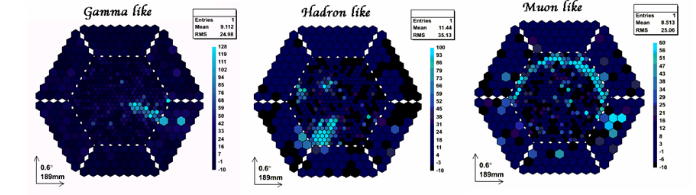
#### Hillas parameter analysis was developed back in 1985 to separate between gamma-like and hadron-like events as recorded by Cherenkov telescopes, many techniques have been used for gamma/hadron separation based on such parameters, based on second moments of image in telescope camera as input.


### Exercício Computacional 01

In [5]:
pip install scikeras

In [6]:
pip install ucimlrepo

In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#### Obtendo conjunto de dados do repositório:

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
magic_gamma_telescope = fetch_ucirepo(id=159)

# data (as pandas dataframes)
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

# metadata
print(magic_gamma_telescope.metadata)

# variable information
print(magic_gamma_telescope.variables)


{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

### Dividindo Conjuntos para Treino e Teste dos modelos neurais:

In [9]:
target = y['class'][:]
T = []
for i in y['class']:
  if i == 'g':
    T.append(1)
  else:
    T.append(0)

data = X.values.tolist()
inputData = np.array(list(k for k in data))
targetData = T


from sklearn.model_selection import train_test_split

#Spliting train and test data
x_train, x_test, y_train, y_test = train_test_split(inputData, targetData, test_size=0.2, stratify=targetData, random_state=0)
x_train = np.array(x_train, dtype=np.float32)  # Ensure x_train is of type float32
x_test = np.array(x_test, dtype=np.float32)   # Ensure x_test is of type float32
y_train = np.array(y_train, dtype=np.float32)  # Ensure y_train is of type float32
y_test = np.array(y_test, dtype=np.float32)   # Ensure y_test is of type float32

### Explorando Variáveis de Entrada

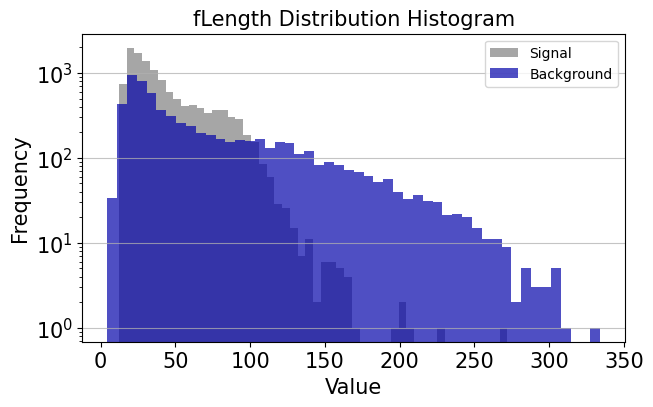

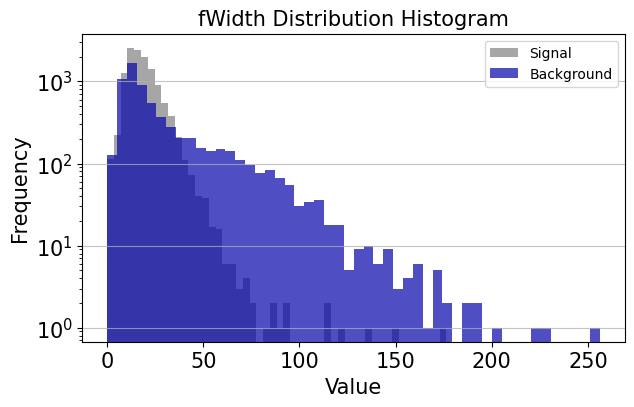

In [10]:
# Exploring input variables
import matplotlib.pyplot as plt

sig = []
bkg = []
for i,j in enumerate(X['fLength']):
  if targetData[i] == 1:
    sig.append(j)
  if targetData[i] == 0:
    bkg.append(j)


plt.figure(figsize=[7,4])
plt.hist(x=sig, bins=50, color='grey',alpha=0.7)
plt.hist(x=bkg, bins=50, color='#0504aa',alpha=0.7)
plt.legend(['Signal','Background'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('fLength Distribution Histogram',fontsize=15)
plt.yscale('log')
plt.show()


sig = []
bkg = []
for i,j in enumerate(X['fWidth']):
  if targetData[i] == 1:
    sig.append(j)
  if targetData[i] == 0:
    bkg.append(j)

plt.figure(figsize=[7,4])
plt.hist(x=sig, bins=50, color='grey',alpha=0.7)
plt.hist(x=bkg, bins=50, color='#0504aa',alpha=0.7)
plt.legend(['Signal','Background'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('fWidth Distribution Histogram',fontsize=15)
plt.yscale('log')
plt.show()

### Construindo os modelos de redes neurais

##### 5 Neurônios na Camada Oculta, 1 neurônio de saída:

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(5, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6551 - loss: 16.7498 - val_accuracy: 0.6593 - val_loss: 5.4986
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6627 - loss: 4.1775 - val_accuracy: 0.6598 - val_loss: 2.3052
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6730 - loss: 1.8346 - val_accuracy: 0.6509 - val_loss: 1.3682
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6653 - loss: 1.1187 - val_accuracy: 0.6577 - val_loss: 1.0047
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6649 - loss: 0.9363 - val_accuracy: 0.6788 - val_loss: 0.8164
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6825 - loss: 0.7674 - val_accuracy: 0.6956 - val_loss: 0.7086
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7054 - loss: 0.6790 - val_accuracy: 0.7116 - val_loss: 0.6444
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7184 - loss: 0.6181 - val_accuracy: 0

##### 20 Neurônios na Camada Oculta, 1 neurônio de saída:

In [12]:
model_2 = Sequential()
model_2.add(Dense(20, activation='relu', input_dim=10))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

hist_2 = model_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=100)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4119 - loss: 12.7601 - val_accuracy: 0.6283 - val_loss: 1.4186
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6431 - loss: 1.2179 - val_accuracy: 0.6614 - val_loss: 0.9610
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6752 - loss: 0.8287 - val_accuracy: 0.6993 - val_loss: 0.7289
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7246 - loss: 0.6340 - val_accuracy: 0.7342 - val_loss: 0.6322
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7534 - loss: 0.5549 - val_accuracy: 0.7442 - val_loss: 0.5713
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7720 - loss: 0.5246 - val_accuracy: 0.7681 - val_loss: 0.5285
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7786 - loss: 0.5025 - val_accuracy: 0.7787 - val_loss: 0.5037
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7788 - loss: 0.4849 - val_accuracy: 0

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


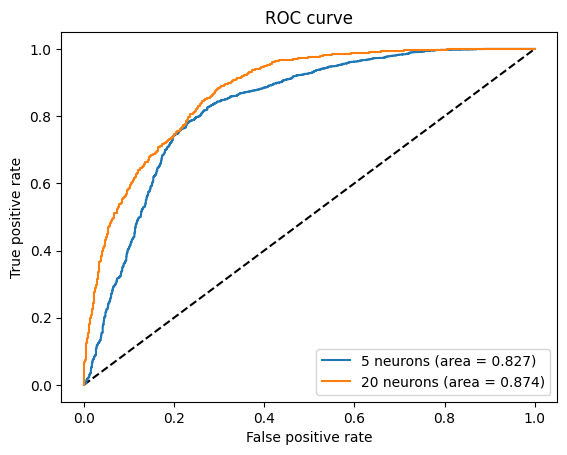

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# model 1
y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

# model 2
y_pred_keras_2 = model_2.predict(x_test).ravel()
fpr_keras_2, tpr_keras_2, thresholds_keras_2 = roc_curve(y_test, y_pred_keras_2)
auc_keras_2 = auc(fpr_keras_2, tpr_keras_2)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='5 neurons (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras_2, tpr_keras_2, label='20 neurons (area = {:.3f})'.format(auc_keras_2))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

plt.show()

### Normalizando variáveis de entrada (min/max):

\begin{equation}
\\
X_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}
\\
\end{equation}

In [14]:
from sklearn import preprocessing
import pandas as pd

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(magic_gamma_telescope.data.features)
scaled_df = pd.DataFrame(d, columns=magic_gamma_telescope.data.features.columns)
print(scaled_df)

data = X.values.tolist()
inputData = np.array(list(k for k in data))
targetData = T


from sklearn.model_selection import train_test_split

#Spliting train and test data
x_train, x_test, y_train, y_test = train_test_split(inputData, targetData, test_size=0.2, stratify=targetData, random_state=0)
x_train = np.array(x_train, dtype=np.float32)  # Ensure x_train is of type float32
x_test = np.array(x_test, dtype=np.float32)   # Ensure x_test is of type float32
y_train = np.array(y_train, dtype=np.float32)  # Ensure y_train is of type float32
y_test = np.array(y_test, dtype=np.float32)   # Ensure y_test is of type float32

        fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
0      0.074306  0.062415  0.208043  0.430390  0.293229  0.470032  0.620576   
1      0.082815  0.045727  0.170668  0.587794  0.558601  0.468649  0.623756   
2      0.478241  0.530579  0.626818  0.027617  0.027263  0.556215  0.468201   
3      0.059212  0.037338  0.117445  0.683714  0.580679  0.469558  0.570630   
4      0.214774  0.120603  0.360674  0.345153  0.271003  0.437870  0.632050   
...         ...       ...       ...       ...       ...       ...       ...   
19015  0.051838  0.042581  0.199527  0.650756  0.582457  0.457992  0.602182   
19016  0.074757  0.026141  0.096363  0.593249  0.412061  0.479112  0.605095   
19017  0.215712  0.185389  0.445594  0.146153  0.080901  0.434164  0.653983   
19018  0.352326  0.299950  0.606919  0.092397  0.100756  0.448838  0.417922   
19019  0.554415  0.206728  0.374926  0.311967  0.227589  0.281277  0.286483   

       fM3Trans    fAlpha     fDist  
0      0.5124

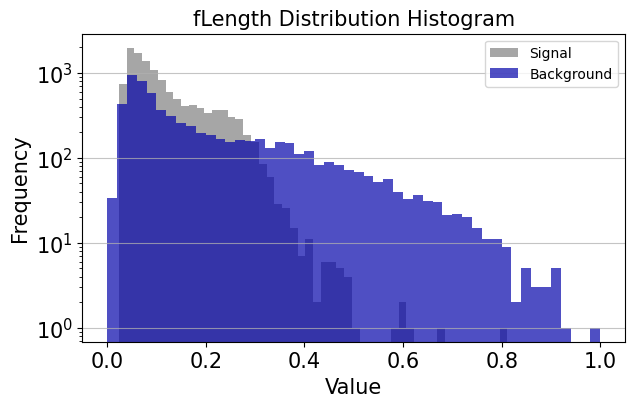

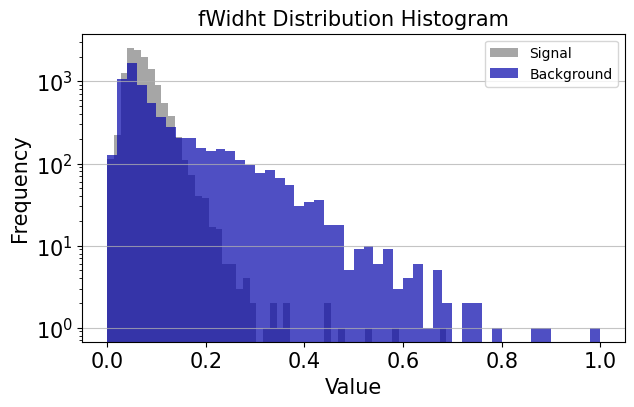

In [15]:
sig = []
bkg = []
for i,j in enumerate(scaled_df['fLength']):
  if targetData[i] == 1:
    sig.append(j)
  if targetData[i] == 0:
    bkg.append(j)



plt.figure(figsize=[7,4])
plt.hist(x=sig, bins=50, color='grey',alpha=0.7)
plt.hist(x=bkg, bins=50, color='#0504aa',alpha=0.7)
plt.legend(['Signal','Background'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('fLength Distribution Histogram',fontsize=15)
plt.yscale('log')
plt.show()

#####################################
sig = []
bkg = []
for i,j in enumerate(scaled_df['fWidth']):
  if targetData[i] == 1:
    sig.append(j)
  if targetData[i] == 0:
    bkg.append(j)


plt.figure(figsize=[7,4])
plt.hist(x=sig, bins=50, color='grey',alpha=0.7)
plt.hist(x=bkg, bins=50, color='#0504aa',alpha=0.7)
plt.legend(['Signal','Background'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('fWidht Distribution Histogram',fontsize=15)
plt.yscale('log')
plt.show()


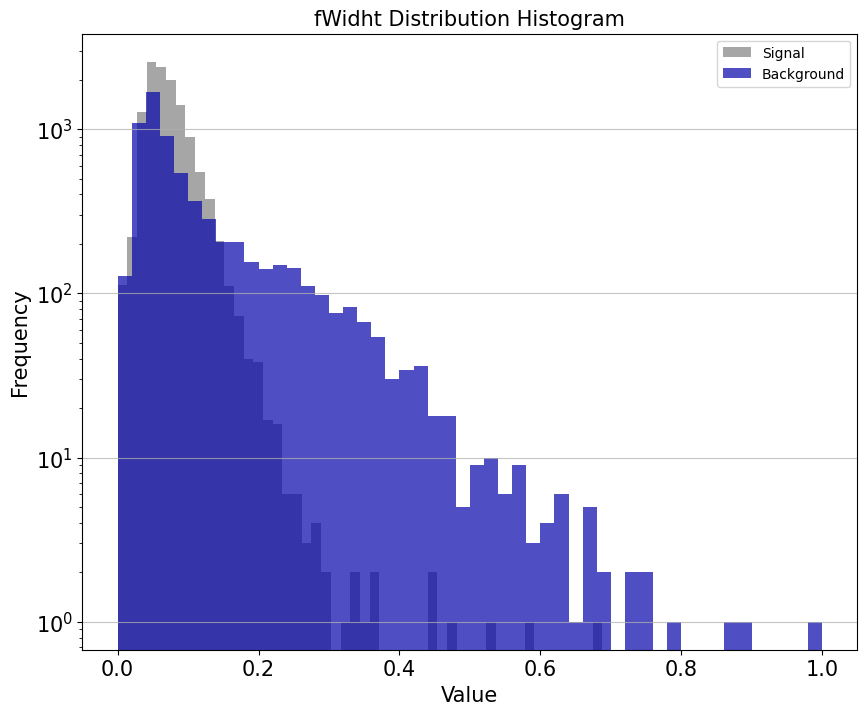

In [16]:
sig = []
bkg = []
for i,j in enumerate(scaled_df['fWidth']):
  if targetData[i] == 1:
    sig.append(j)
  if targetData[i] == 0:
    bkg.append(j)



plt.figure(figsize=[10,8])
plt.hist(x=sig, bins=50, color='grey',alpha=0.7)
plt.hist(x=bkg, bins=50, color='#0504aa',alpha=0.7)
plt.legend(['Signal','Background'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('fWidht Distribution Histogram',fontsize=15)
plt.yscale('log')
plt.show()

In [17]:
model_3 = Sequential()
model_3.add(Dense(5, activation='relu', input_dim=10))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.summary()

model_4 = Sequential()
model_4.add(Dense(20, activation='relu', input_dim=10))
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_4.summary()

hist_3 = model_3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=100)
hist_4 = model_4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3506 - loss: 86.6217 - val_accuracy: 0.3499 - val_loss: 48.8212
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3410 - loss: 39.3430 - val_accuracy: 0.3460 - val_loss: 9.0436
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4026 - loss: 6.3294 - val_accuracy: 0.5326 - val_loss: 2.0863
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5967 - loss: 1.4265 - val_accuracy: 0.7229 - val_loss: 0.6307
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7290 - loss: 0.6094 - val_accuracy: 0.7526 - val_loss: 0.5410
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7533 - loss: 0.5473 - val_accuracy: 0.7705 - val_loss: 0.5073
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7656 - loss: 0.5172 - val_accuracy: 0.7802 - val_loss: 0.4942
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7745 - loss: 0.5094 - val_accuracy:

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


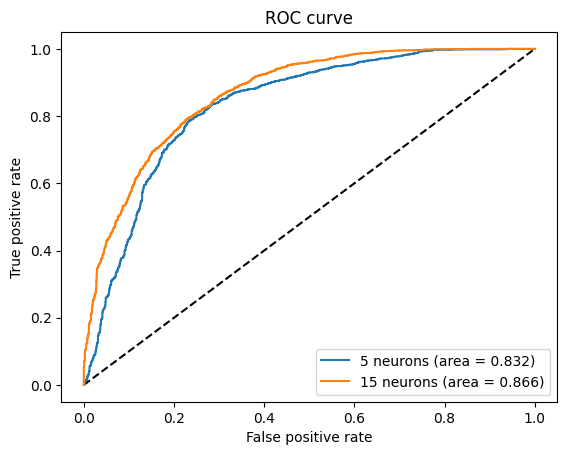

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# model 1
y_pred_keras = model_3.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

# model 2
y_pred_keras_2 = model_4.predict(x_test).ravel()
fpr_keras_2, tpr_keras_2, thresholds_keras_2 = roc_curve(y_test, y_pred_keras_2)
auc_keras_2 = auc(fpr_keras_2, tpr_keras_2)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='5 neurons (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras_2, tpr_keras_2, label='15 neurons (area = {:.3f})'.format(auc_keras_2))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

plt.show()